In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Functions used throughout the notebook for block matching and dynamic programming

In [2]:
def sad(block1: np.ndarray, block2: np.ndarray) -> int:
    assert block1.shape==block2.shape, 'Block shapes must match'
    total = np.sum(np.abs(block2.astype(int)-block1.astype(int)))
    return total

def ssd(block1: np.ndarray, block2: np.ndarray) -> int:
    assert block1.shape==block2.shape, 'Block shapes must match'
    total = np.sum(np.square(block2.astype(int)-block1.astype(int)))
    return total

def compute_disparity(img_l, img_r, block_size=5, error='SAD', max_disparity=32):
    if error=='SAD':
        error_fun = sad
    elif error=='SSD':
        error_fun = ssd
    else:
        raise TypeError('Error function unknown. Use "SAD" or "SSD"')
    
    assert img_l.shape==img_r.shape, 'Image shapes must match'
    half_block = int(block_size/2)
    height, width = img_l.shape
    disparity = np.zeros(img_l.shape[:2])
    for y in range(half_block, height-half_block):
        for x in range(half_block, width-half_block):
            min_err = float('inf')
            best_disparity = 0
            template = img_l[y-half_block:y+half_block+1, x-half_block:x+half_block+1]
            for d in range(max(0, x - max_disparity), min(img_l.shape[1], x + 1)):
                block_right = img_r[y-half_block:y+half_block+1, d-half_block:d+half_block+1]
                if template.shape == block_right.shape:
                    err = error_fun(template, block_right)
                    if err < min_err:
                        min_err = err
                        best_disparity = x - d
            disparity[y, x] = best_disparity
    return disparity

def compute_and_display(img_l, img_r, max_disparity=32):
    sad_maps = []
    sad_maps.append(compute_disparity(img_l, img_r, block_size=1, max_disparity=max_disparity, error='SAD'))
    sad_maps.append(compute_disparity(img_l, img_r, block_size=5, max_disparity=max_disparity, error='SAD'))
    sad_maps.append(compute_disparity(img_l, img_r, block_size=9, max_disparity=max_disparity, error='SAD'))

    ssd_maps = []
    ssd_maps.append(compute_disparity(img_l, img_r, block_size=1, max_disparity=max_disparity, error='SSD'))
    ssd_maps.append(compute_disparity(img_l, img_r, block_size=5, max_disparity=max_disparity, error='SSD'))
    ssd_maps.append(compute_disparity(img_l, img_r, block_size=9, max_disparity=max_disparity, error='SSD'))

    plt.figure(figsize=(10,15))
    idx_to_block_size = [1,5,9]

    for i in range(3):
        plt.subplot(3,2,(i*2+1))
        plt.imshow(sad_maps[i], 'jet')
        plt.title('SAD Block size: '+ str(idx_to_block_size[i]))
        
        plt.subplot(3,2,((i+1)*2))
        plt.imshow(ssd_maps[i], 'jet')
        plt.title('SSD Block size: '+ str(idx_to_block_size[i]))

    plt.show()

### Loading and displaying images

In [3]:
img1 = cv.cvtColor(cv.imread('Stereo_material/l1.png'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread('Stereo_material/r1.png'), cv.COLOR_BGR2RGB)

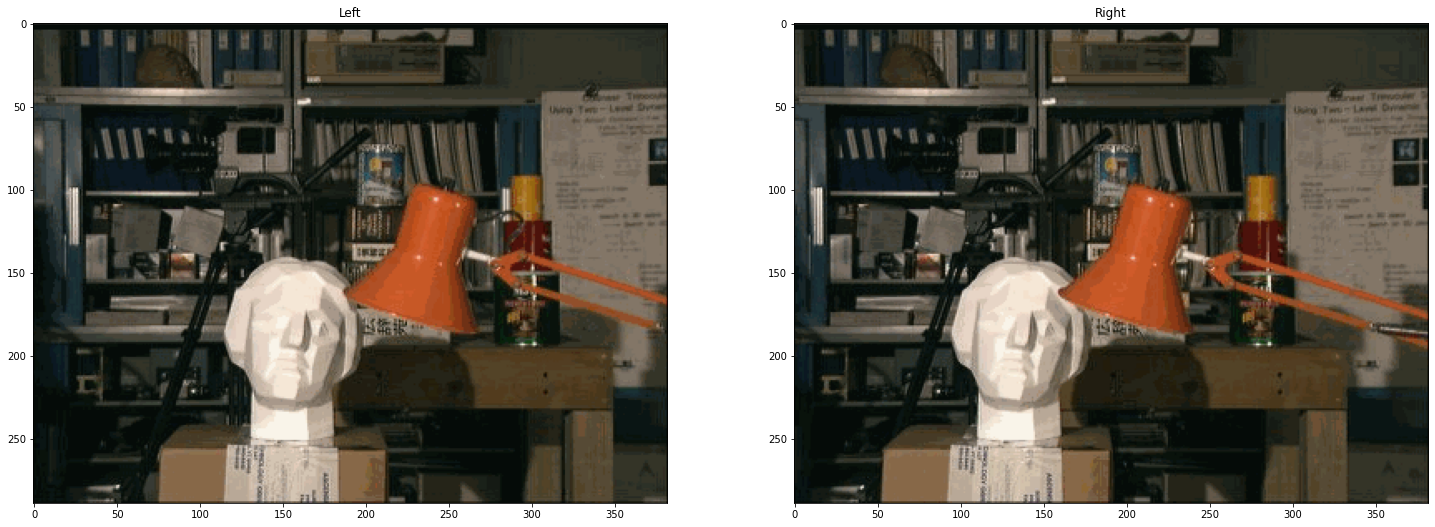

In [4]:
fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title('Right')

plt.show()

In [5]:
im1gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
im2gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

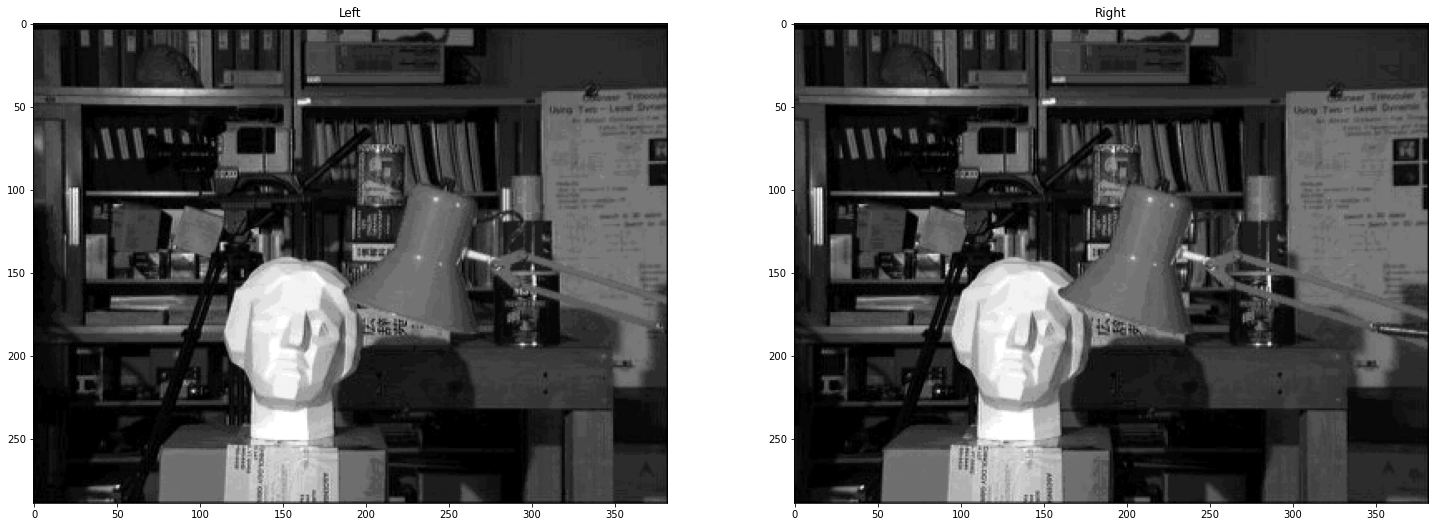

In [6]:
fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(im1gray, cmap='gray')
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(im2gray, cmap='gray')
plt.title('Right')

plt.show()

## Block matching

### Computing disparity using SAD

In [7]:
sad_maps = []
sad_maps.append(compute_disparity(im1gray, im2gray, block_size=1, max_disparity=32, error='SAD'))
sad_maps.append(compute_disparity(im1gray, im2gray, block_size=5, max_disparity=32, error='SAD'))
sad_maps.append(compute_disparity(im1gray, im2gray, block_size=9, max_disparity=32, error='SAD'))

### Computing disparity using SSD

In [8]:
ssd_maps = []
ssd_maps.append(compute_disparity(im1gray, im2gray, block_size=1, max_disparity=32, error='SSD'))
ssd_maps.append(compute_disparity(im1gray, im2gray, block_size=5, max_disparity=32, error='SSD'))
ssd_maps.append(compute_disparity(im1gray, im2gray, block_size=9, max_disparity=32, error='SSD'))

### Displaying results side by side

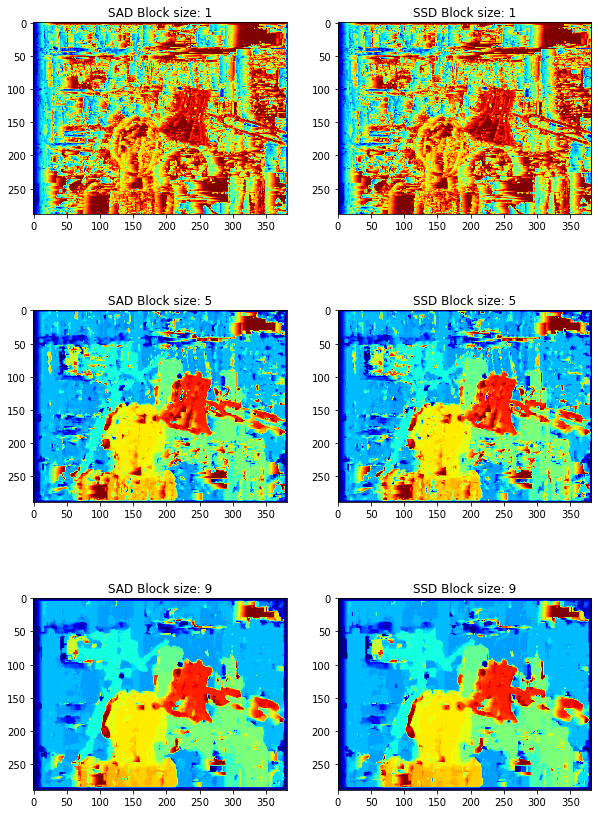

In [9]:
fig = plt.figure(figsize=(10,15))
idx_to_block_size = [1,5,9]

for i in range(3):
    plt.subplot(3,2,(i*2+1))
    plt.imshow(sad_maps[i], 'jet')
    plt.title('SAD Block size: '+ str(idx_to_block_size[i]))

for i in range(3):
    plt.subplot(3,2,((i+1)*2))
    plt.imshow(ssd_maps[i], 'jet')
    plt.title('SSD Block size: '+ str(idx_to_block_size[i]))

plt.show()

### Repeating for other images

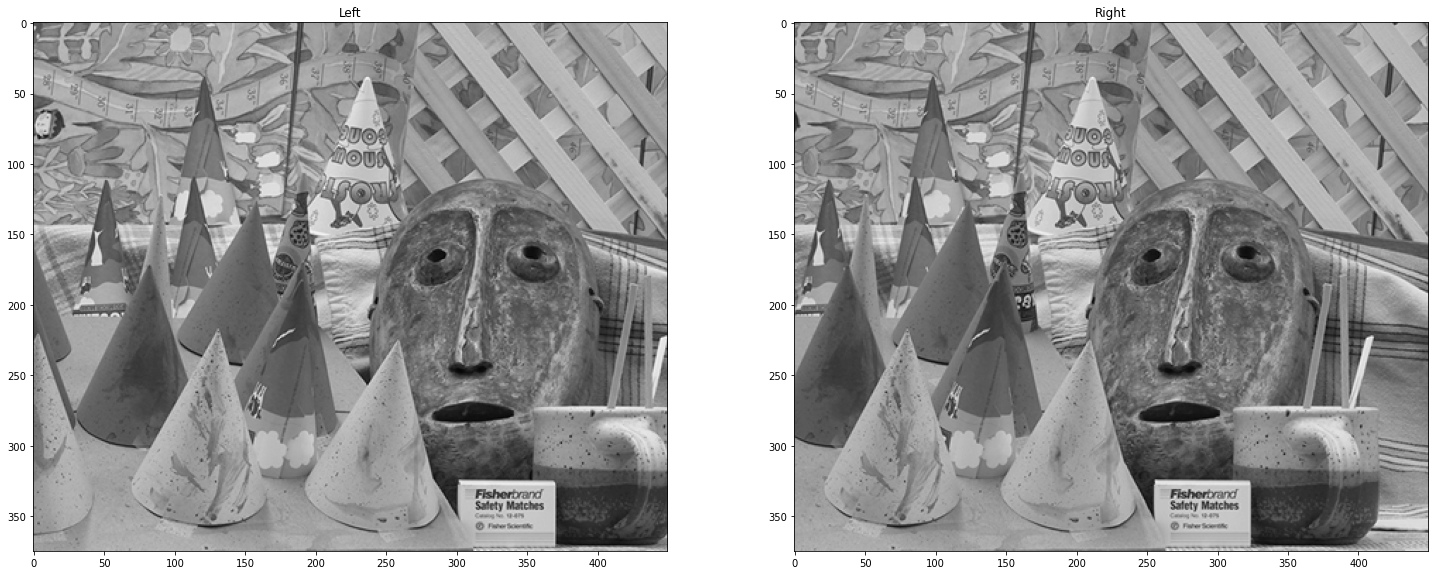

In [10]:
left = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/l2.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)
right = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/r2.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(left, cmap='gray')
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(right, cmap='gray')
plt.title('Right')

plt.show()

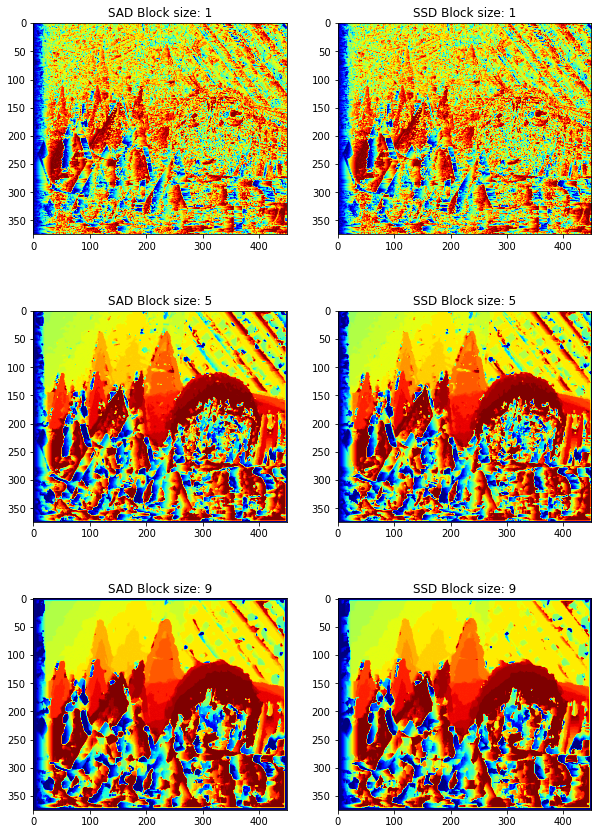

In [11]:
compute_and_display(left, right)

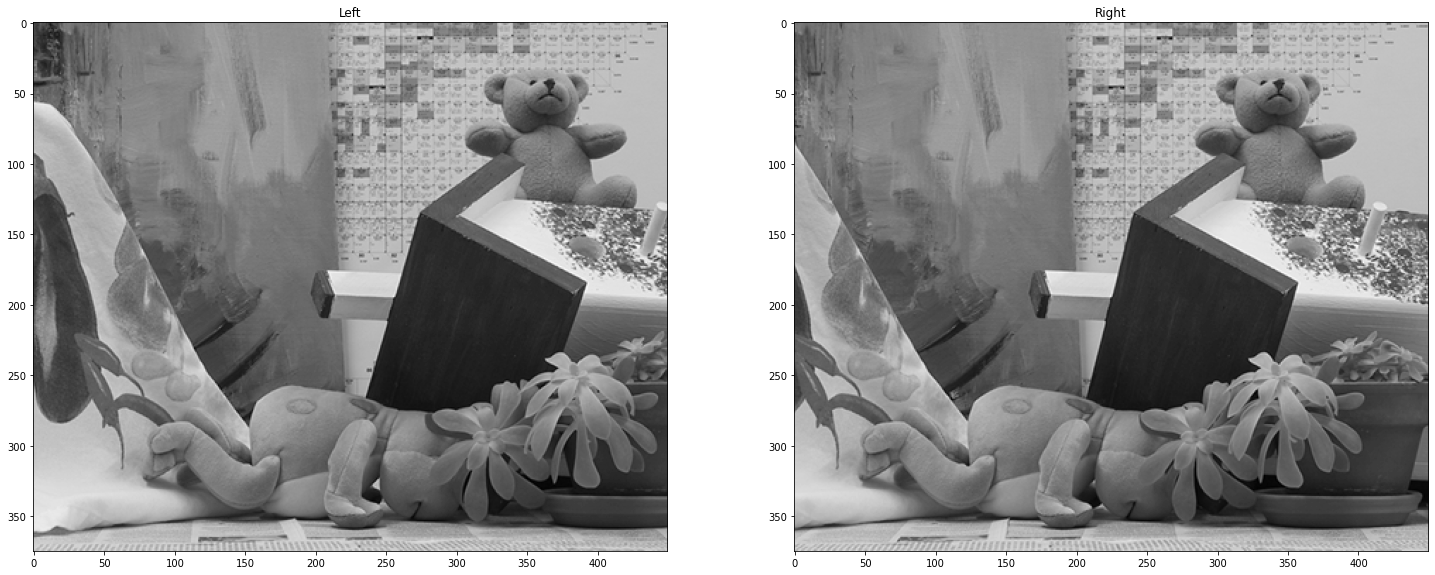

In [12]:
left = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/l3.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)
right = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/r3.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(left, cmap='gray')
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(right, cmap='gray')
plt.title('Right')

plt.show()

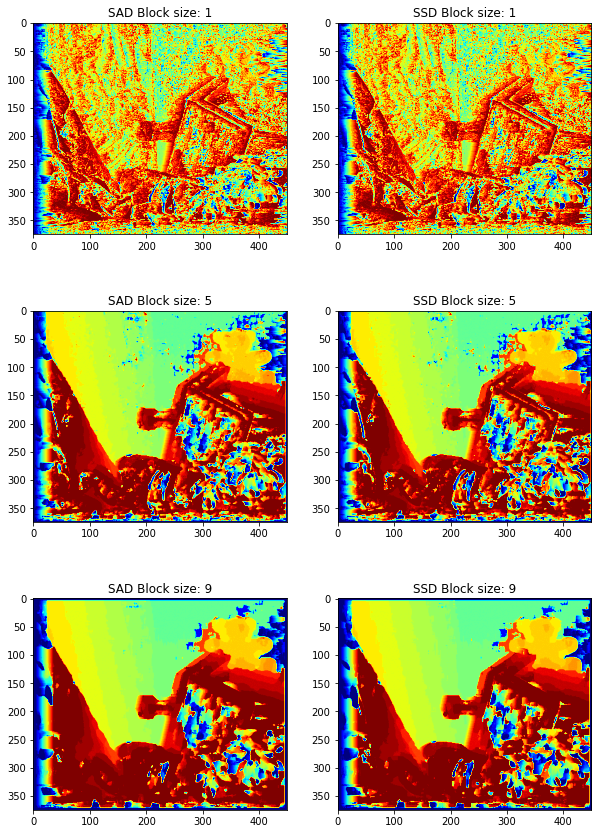

In [13]:
compute_and_display(left, right)

## Dynamic programming

In [14]:
def dij(pixel_left:np.uint8, pixel_right:np.uint8, sigma:float=2):
    return np.square(pixel_left.astype(int)-pixel_right.astype(int))/np.square(sigma)

cost_matrix = np.zeros((5,5))

def D(line_left, line_right, i, j, c0=1):
    global cost_matrix
    if i<0 or j<0:
        return np.inf
    
    if i==0 and j==0:
        cost_matrix[i,j] = dij(line_left[i], line_right[j])
    elif cost_matrix[i,j]==-1:
        ops = [ D(line_left, line_right, i-1, j-1) + dij(line_left[i], line_right[j]),
                D(line_left, line_right, i-1,j) + c0,
                D(line_left, line_right, i,j-1) + c0]
        cost_matrix[i,j] = np.min(ops)

    return cost_matrix[i,j]

def build_cost_matrix(left_line, right_line, c0=1):
    cost_matrix = np.zeros((left_line.shape[0], right_line.shape[0]))
    for i in range(left_line.shape[0]):
        for j in range(right_line.shape[0]):
            if i==0 and j==0:
                cost_matrix[i,j] = dij(left_line[i], right_line[j])
            else:
                if i-1>=0 and j-1>=0:
                    op1 = cost_matrix[i-1,j-1] + dij(left_line[i], right_line[j])
                    op2 = cost_matrix[i-1,j] + c0
                    op3 = cost_matrix[i,j-1] + c0
                elif i-1>=0:
                    op1 = np.inf
                    op2 = cost_matrix[i-1,j] + c0
                    op3 = np.inf
                elif j-1>=0:
                    op1 = np.inf
                    op2 = np.inf
                    op3 = cost_matrix[i,j-1] + c0
                else:
                    op1 = np.inf
                    op2 = np.inf
                    op3 = np.inf
                cost_matrix[i,j] = np.min([op1,op2,op3])
    return cost_matrix



def compute_per_line_recursive(line_left:np.ndarray, line_right:np.ndarray):
    global cost_matrix
    line_disparity = np.zeros(line_left.shape)
    cost_matrix = np.zeros((line_left.shape[0], line_right.shape[0]))-1
    i = j = line_left.shape[0]-1
    while i>=0 and j>=0:
        ops = [D(line_left, line_right, i-1,j-1), 
                   D(line_left, line_right, i-1,j), 
                   D(line_left, line_right, i,j-1)]
        min_op = np.argmin(ops)
        if min_op==0:
            line_disparity[i] = np.abs(i-j)
            i-=1
            j-=1
        elif min_op==1:
            i-=1
        elif min_op==2:
            j-=1
        
    return line_disparity

def compute_per_line_top_down(line_left:np.ndarray, line_right:np.ndarray):
    global cost_matrix
    line_disparity = np.zeros(line_left.shape)
    cost_matrix = build_cost_matrix(line_left, line_right)
    i = j = line_left.shape[0]-1
    while i>=0 and j>=0:
        ops = [cost_matrix[i-1,j-1], 
                cost_matrix[i-1, j], 
                cost_matrix[i, j-1]]
        min_op = np.argmin(ops)
        if min_op==0:
            line_disparity[i] = np.abs(i-j)
            i-=1
            j-=1
        elif min_op==1:
            i-=1
        elif min_op==2:
            j-=1
        
    return line_disparity


def dynamic_programming_disparity(img_left:np.ndarray, img_right:np.ndarray, approach='r'):
    disparity_map = []
    for line_left, line_right in zip(img_left, img_right):
        if approach=='r':
            disparity = compute_per_line_recursive(line_left, line_right)
        elif approach=='t':
            disparity = compute_per_line_top_down(line_left, line_right)
        disparity_map.append(disparity)

    return np.array(disparity_map)

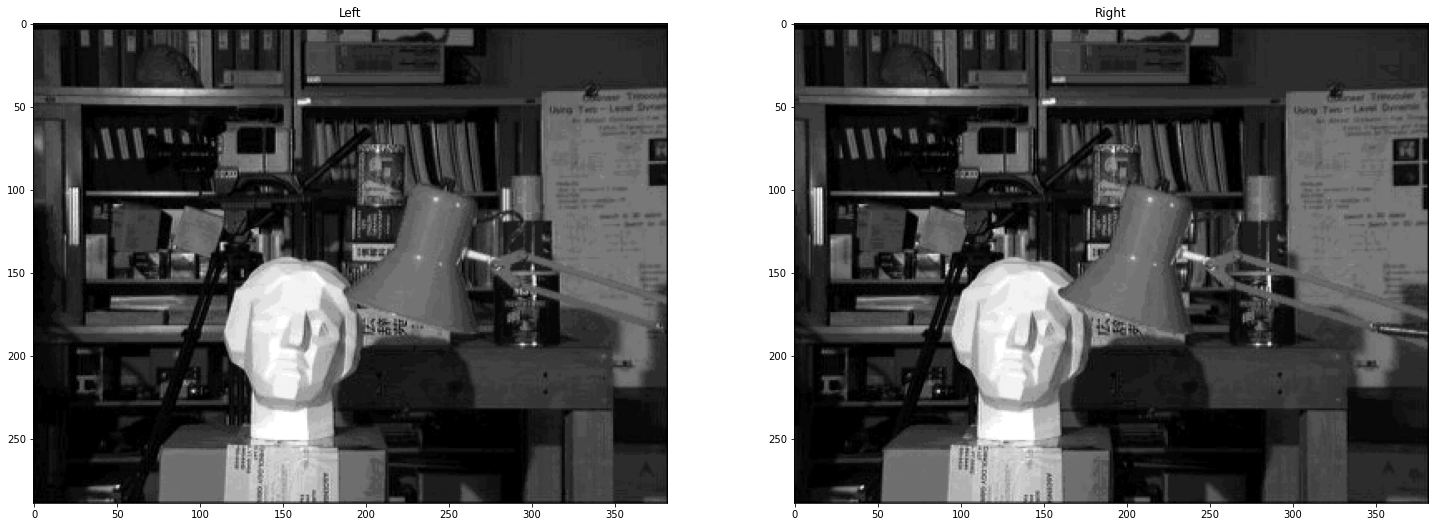

In [15]:
left = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/l1.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)
right = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/r1.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(left, cmap='gray')
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(right, cmap='gray')
plt.title('Right')

plt.show()

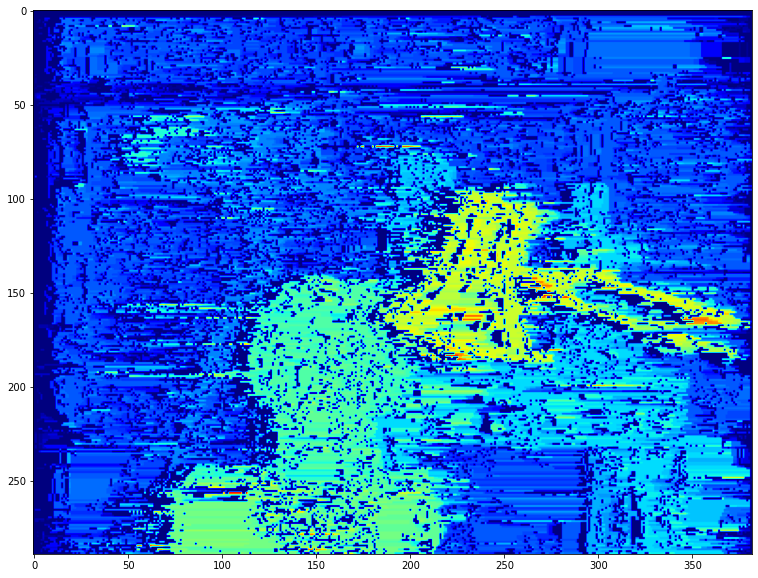

In [16]:
d_map = dynamic_programming_disparity(left, right)

plt.figure(figsize=(15,10))
plt.imshow(d_map, 'jet')
plt.show()

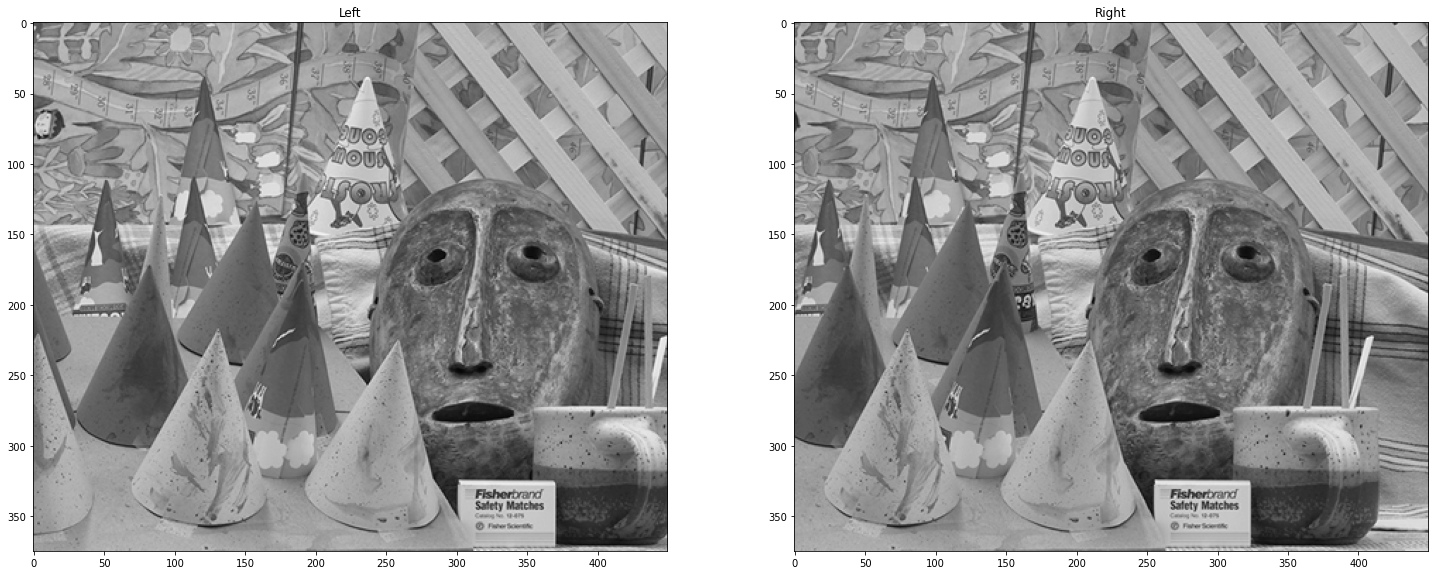

In [17]:
left = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/l2.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)
right = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/r2.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(left, cmap='gray')
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(right, cmap='gray')
plt.title('Right')

plt.show()

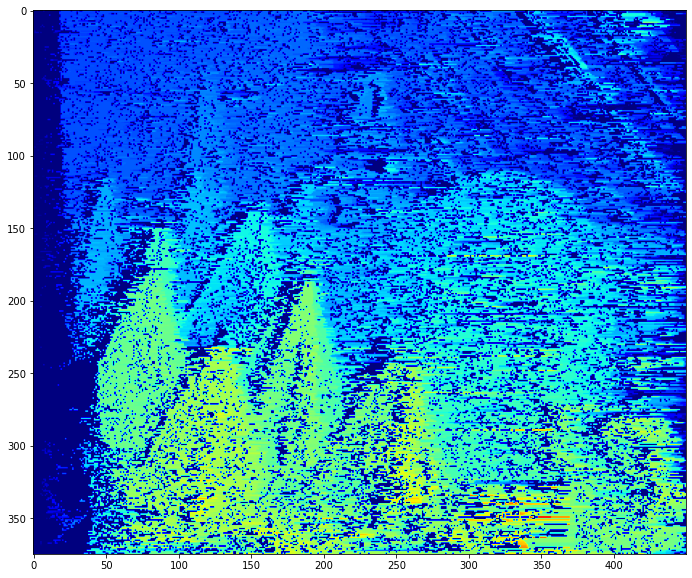

In [18]:
d_map = dynamic_programming_disparity(left, right)

plt.figure(figsize=(15,10))
plt.imshow(d_map, 'jet')
plt.show()

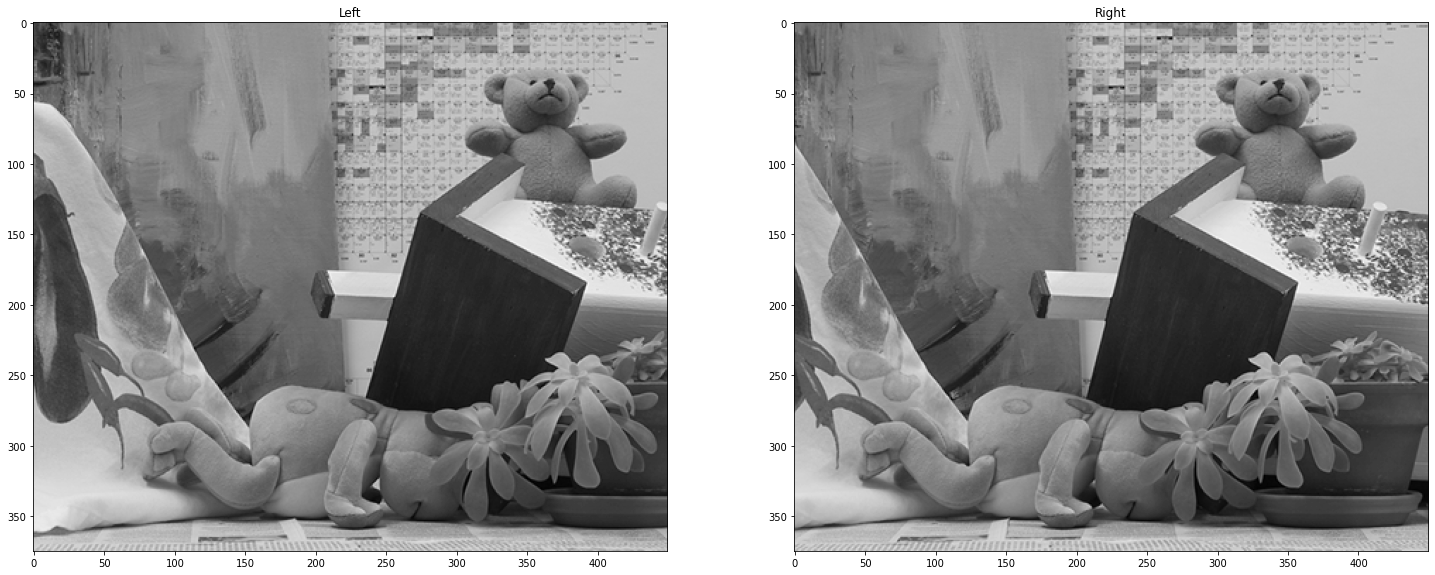

In [19]:
left = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/l3.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)
right = cv.cvtColor(cv.cvtColor(cv.imread('Stereo_material/r3.png'), cv.COLOR_BGR2RGB), cv.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.imshow(left, cmap='gray')
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(right, cmap='gray')
plt.title('Right')

plt.show()

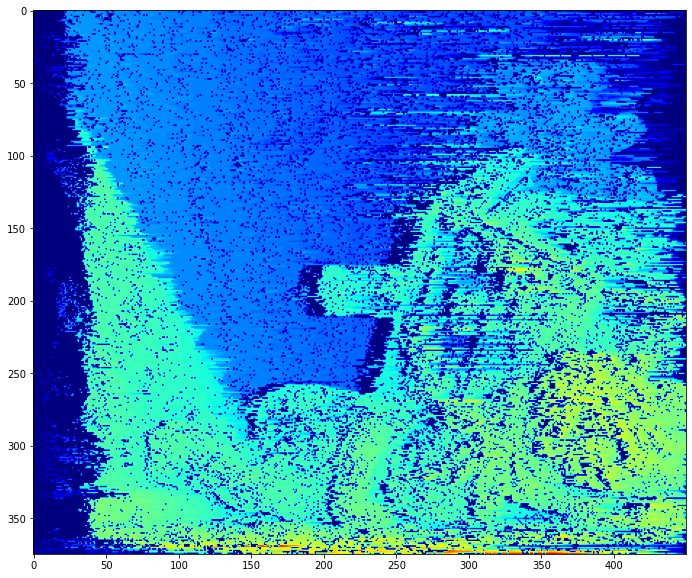

In [20]:
d_map = dynamic_programming_disparity(left, right)

plt.figure(figsize=(15,10))
plt.imshow(d_map, 'jet')
plt.show()